### Breast Cancer Classification

##### Introduction

Breast cancer is one of the most common cancers affecting women worldwide. Early detection and accurate diagnosis play a crucial role in improving patient outcomes and survival rates. To support these efforts, machine learning can be employed to analyze and classify tumor cells as either benign (non-cancerous) or malignant (cancerous) based on cellular characteristics.

The Wisconsin Breast Cancer Classification dataset is widely used for developing and evaluating classification models aimed at assisting in breast cancer diagnosis. It consists of measurements from fine needle aspirates (FNA) of breast masses, which quantify various cell features that help distinguish between benign and malignant cases. By building an effective classification model, healthcare providers can gain insights into these cellular features and improve diagnostic processes.



##### Project Objective


The objective of this project is to build a machine learning model to classify breast cancer cases as benign (label 0) or malignant (label 1) using the Wisconsin Breast Cancer dataset. The ultimate goal is to achieve a high-performance model that can accurately predict tumor types, aiding early detection and reducing diagnostic errors.

##### Data Dictionary

The dataset includes 30 numerical features, which are divided into three categories for each cell nucleus feature: mean, standard error (SE), and worst values. These features represent various physical and geometric properties of the cells.  

1. radius_mean: Mean of distances from center to points on perimeter
2. texture_mean: Standard deviation of gray-scale values.  
3. perimeter_mean: Mean size of the cell nucleus boundary.
4. area_mean: Mean size of the cell nucleus.
5. smoothness_mean: Mean of local variation in radius lengths.
6. compactness_mean: Mean of perimeter²/area - 1.0.
7. concavity_mean: Mean severity of concave portions of the contour.
8. concave points_mean: Mean number of concave portions of the contour.
9. symmetry_mean: Mean symmetry of the cell nuclei.
10. fractal_dimension_mean: Mean of "coastline approximation" of the contour.
11. radius_se, texture_se, ..., fractal_dimension_se: Standard error of the respective feature.
12. radius_worst, texture_worst, ..., fractal_dimension_worst	Worst-case (largest) value of the respective feature.


### Preparing the Dataset

The dataset contains information about breast cancer tumors with 569 entries.
Each enty  represents a tumor and includes various features measured, such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

In [40]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [41]:
# Loading Brest Cancer Dataset
df = pd.read_csv('Breast_Cancer_Data.csv')

In [42]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Exploration and Preprocessing

Exploring data is an essential step in any data analysis project. It helps us understand the structure of the dataset, identify any missing or erroneous values, and gain insights into the relationships between variables.

In [43]:
# Displaying the shape of the dataset (number of rows, number of columns)
df.shape

(569, 33)

In [44]:
# Displaying dataset information (data types, number of non-null values, columns and rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### From the information on our dataframe:
1. There are no missing values in any of the columns except for 'Unnamed: 32', which has all values missing (0 non-null values).
2. All columns, except 'diagnosis', are numerical (float64 or int64), which is suitable for machine learning models.hms.

##### Potential Preprocessing Steps:
1. Drop the 'id' column as it likely does not provide meaningful information for classification.
2. Drop the 'Unnamed: 32' column as it contains no useful information.
3. Encode the 'diagnosis' column to numerical values (e.g., 0 for benign, 1 for malignant) for model training.

In [45]:
# Remove the 'id' and 'Unnamed: 32' columns from the DataFrame
df.drop(['id', 'Unnamed: 32'], axis =1, inplace = True )

In [46]:
# Get the unique values in the 'diagnosis' column of the dataset
print(df['diagnosis'].unique())

# One Hot Encoding the Diagnosis Column
df = pd.get_dummies(data=df, drop_first=True, dtype = 'int64')

['M' 'B']


In [47]:
# Generating descriptive statistics of the DataFrame
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [48]:
# Check the distribution of 'diagnosis' to understand the class balance.
class_distribution = df['diagnosis_M'].value_counts(normalize = True)
print(class_distribution* 100)

diagnosis_M
0    62.741652
1    37.258348
Name: proportion, dtype: float64


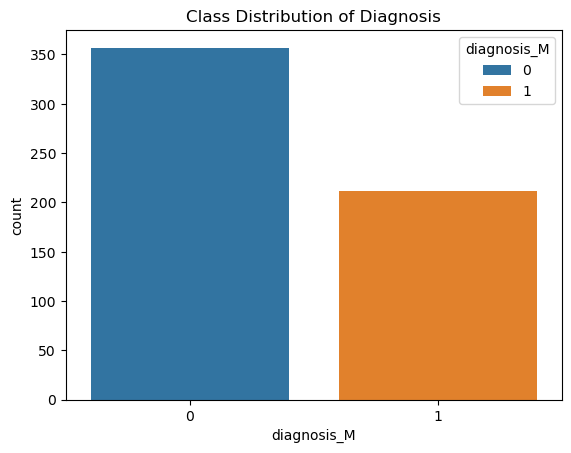

In [49]:
# Visualising class balance.
sns.countplot(x='diagnosis_M', data= df, hue= 'diagnosis_M')
plt.title('Class Distribution of Diagnosis')
plt.show()

##### Visualize the distribution of a feature for each class

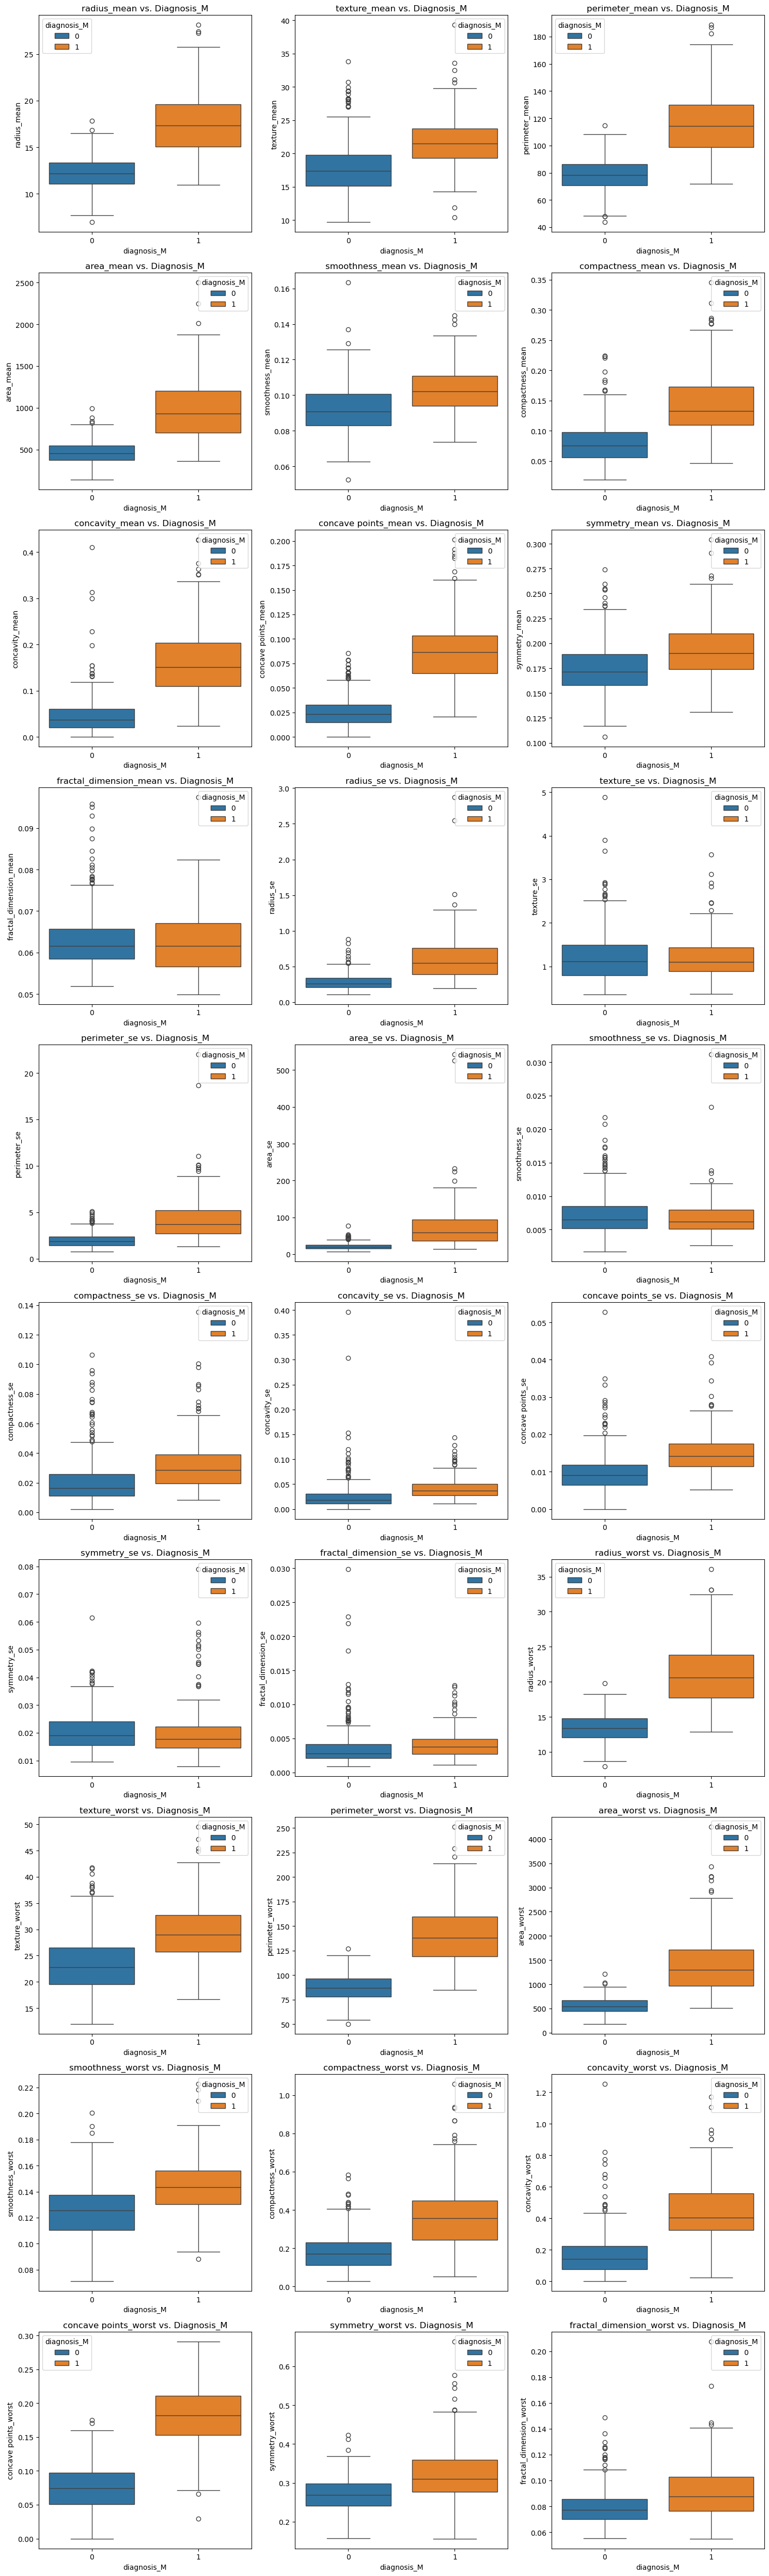

In [50]:
# Getting the list of numerical column names
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Remove the 'diagnosis_M' column from the list if it's present
columns = [col for col in columns if col != 'diagnosis_M']

# Create a grid of subplots
fig, axes = plt.subplots(10, 3, figsize=(15, 50))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Create box plots for each numerical column
for i, col in enumerate(columns):
    sns.boxplot(x='diagnosis_M', y=col, data=df, ax=axes[i], hue = 'diagnosis_M')
    axes[i].set_title(f'{col} vs. Diagnosis_M')
    
plt.tight_layout()
plt.show()

In [51]:
# Calculate the correlation matrix
corr = df.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


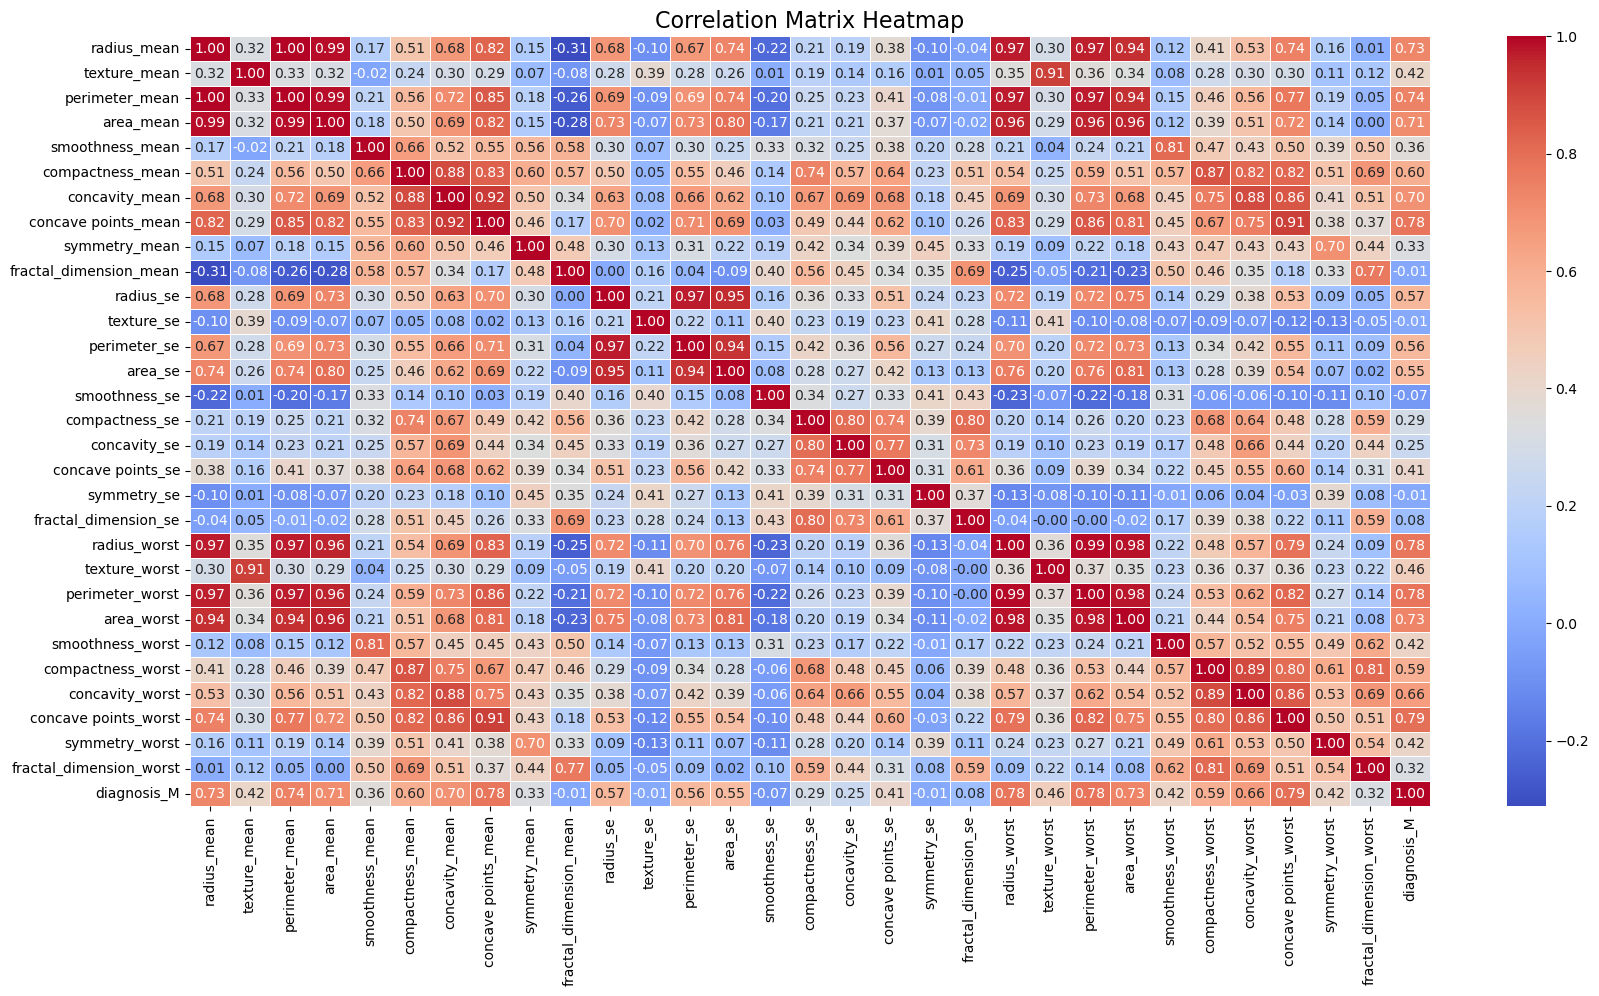

In [52]:
# Plot Heatmap of Correlation Analysis
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

### Data Modelling and Feature Scaling


In [53]:
# Seperate Dataset into Features and Labels
X = df.drop('diagnosis_M', axis = 1)
y = df['diagnosis_M']

In [54]:
# Splitting Data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [55]:
# Scaling numerical features
scaler = StandardScaler()

In [56]:
# Scaling X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building the Model

In [57]:
# Define the names of the classifiers
names = ['Logistic Regression', 'Nearest Neighbors', 'Random Forest']

In [58]:
# Define the classifiers with their respective hyperparameters
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    ]

In [59]:
# Empty lists to store results
results = []  # Stores evaluation metrics for each classifier
models = {}  # Stores trained models
confusion_mat = {}  # Stores confusion matrices for each classifier
class_report = {}  # Stores classification reports for each classifier

# Iterate over each classifier
for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    clf.fit(X_train, y_train)
    
    print ('... predicting')
    # Predicting on the training data
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    # Calculating evaluation metrics
    accuracy  = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall    = recall_score(y_train, y_pred)
    f1        = f1_score(y_test, y_pred_test)

       
    # Save the results to dictionaries
    models[name] = clf    
    confusion_mat[name] = confusion_matrix(y_train, y_pred)
    class_report[name] = classification_report(y_train, y_pred)
    
    # Append results to the list
    results.append([name, accuracy, precision, recall, f1])

    
# Convert results to DataFrame for easy visualisation
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1'])
results.set_index('Classifier', inplace= True)

print ('Finished!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Finished!


In [60]:
# Viewing Results
results.sort_values('Recall', ascending=False)

,Accuracy,Precision,Recall,F1
Classifier,,,,
Logistic Regression,0.986813,0.988024,0.976331,0.964706
Random Forest,0.982418,0.993865,0.958580,0.928571
Nearest Neighbors,0.980220,1.000000,0.946746,0.930233


### Checking Model Robustness

In [61]:
for model in classifiers:
    cross_score = cross_val_score(estimator= model, X=X_train, y=y_train, cv=10)
    print(model, ':')
    print("Accuracy is {:.2f} %".format(cross_score.mean()*100))
    print("Standard Deviation is {:.2f} %".format(cross_score.std()*100))
    print()

LogisticRegression() :
Accuracy is 97.36 %
Standard Deviation is 1.93 %

KNeighborsClassifier() :
Accuracy is 96.70 %
Standard Deviation is 3.02 %

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10) :
Accuracy is 93.84 %
Standard Deviation is 3.26 %



### Hyperparameter Tuning

In [62]:
# Creating Params Grid
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],              
    'solver': ['liblinear', 'saga']       
}


In [63]:
# Initialise GridSearch object
grid_search = GridSearchCV(estimator=models['Logistic Regression'] , param_grid= params, 
                                   scoring='f1', cv=5, verbose=1, n_jobs= -1)

In [64]:
# Fit GridSearch
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [65]:
# Best Estimator
grid_search.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [66]:
# Best Score
grid_search.best_score_

0.9697832515742963

In [67]:
# Best Parameters
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

### Final model (Logistic regression)

In [75]:
# Training Model
lr = grid_search.best_estimator_
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [76]:
# Predicting on X-test
y_pred = lr.predict(X_test)

In [70]:
# Function to evaluate Model
def calc_metrics(test_y, gen_y):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    return acc,f1,pre,rec

In [71]:
# Evaluating model
acc_score, f1_score, pre_score, rec_score = calc_metrics(y_test, y_pred)

print("Accuracy:", acc_score)
print("F1 Score:", f1_score)
print("Precision:", pre_score)
print("Recall:", rec_score)

Accuracy: 0.9912280701754386
F1 Score: 0.9882352941176471
Precision: 1.0
Recall: 0.9767441860465116


### Cross validation

In [77]:
cross_score = cross_val_score(estimator= lr, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(cross_score.mean()*100))
print("Standard Deviation is {:.2f} %".format(cross_score.std()*100))

Accuracy is 98.02 %
Standard Deviation is 1.17 %


#### Making a Predicition on Unseeen Data

In [79]:
# Creating an observation array
tumor_arr = [[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760,	0.3001,	0.14710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904,	0.05373, 0.01587, 0.03003, 0.006193, 25.38,
17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]]

In [81]:
# Creating a Df for a Single observation
tumor_df = pd.DataFrame(data=tumor_arr, columns= df.columns[0:30])

In [83]:
# Make Predicition
lr.predict(scaler.transform(tumor_df))

array([1], dtype=int64)